In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [17]:
def create_model(optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
adam_model = create_model(Adam())
history_adam = adam_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)
test_loss_adam, test_acc_adam = adam_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9320 - loss: 0.3158


In [20]:
rmsprop_model = create_model(RMSprop())
history_rmsprop = rmsprop_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)
test_loss_rmsprop, test_acc_rmsprop = rmsprop_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9425 - loss: 0.6751


In [21]:
print(f"Test accuracy with Adam: {test_acc_adam:.4f}")
print(f"Test accuracy with RMSprop: {test_acc_rmsprop:.4f}")
print(f"Test loss with Adam: {test_loss_adam:.4f}")
print(f"Test loss with RMSprop: {test_loss_rmsprop:.4f}")


Test accuracy with Adam: 0.9380
Test accuracy with RMSprop: 0.9502
Test loss with Adam: 0.2734
Test loss with RMSprop: 0.5577


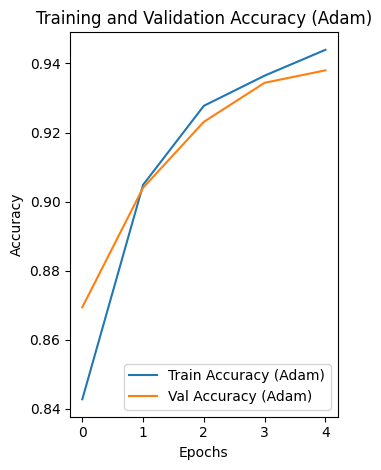

In [22]:
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Train Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Val Accuracy (Adam)')
plt.title('Training and Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

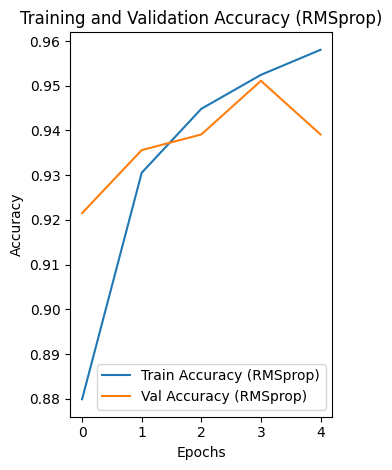

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.history['accuracy'], label='Train Accuracy (RMSprop)')
plt.plot(history_rmsprop.history['val_accuracy'], label='Val Accuracy (RMSprop)')
plt.title('Training and Validation Accuracy (RMSprop)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()